# Praca domowa 6
Dorota Rzewnicka

## Zadanie 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
df[(df.waterfront == 1) & (df.grade >= df.grade.median())].price.mean()

1784151.7006802722

Odp: 1784151.70 USD

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
dwa = df[df.floors == 2].bathrooms.median()
trzy = df[df.floors == 3].bathrooms.median()
dwa > trzy

False

Odp: Nie mają

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
df[df.lat > df.lat.mean()].groupby("waterfront").grade.quantile(q=[0.25,0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    11.0
Name: grade, dtype: float64

Odp: Dla nieruchomości z widokiem na wodę: kwartyl 0.25 wynosi 8, a kwartyl 0.75 wynosi 11, a dla tych bez widoku: kwartyl 0.25 jest równy 7, a kwartyl 0.75 jest równy 8.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
df.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
kwartyle = df[df.zipcode == 98103].price.quantile([0.25,0.75])
kwartyle[0.75] - kwartyle[0.25]

262875.0

Odp: Najwięcej nieruchomości jest pod kodem 98103, a IQR ich cen wynosi 262875.

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
df.sqft_living[df.sqft_living < df.sqft_living15].count()/df.sqft_living.count()*100

42.594734650441865

Odp: 42.59 %

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [ ]:
polnocny_zachod = df[(df.lat > df.lat.mean()) & (df.long < df.long.mean())].count()[1]
poludniowy_wschod = df[(df.lat < df.lat.mean()) & (df.long > df.long.mean())].count()[1]
(polnocny_zachod - poludniowy_wschod) / poludniowy_wschod * 100

29.665974712209852

Odp: O 29.67 % więcej

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

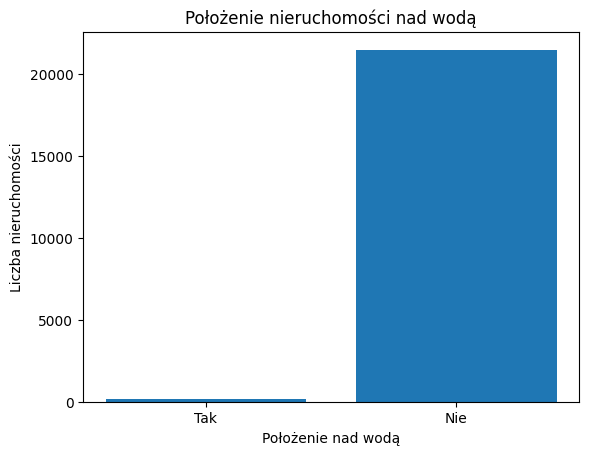

In [ ]:
v1 = df[df.waterfront == 1].count()[0]
v2 = df[df.waterfront == 0].count()[0]
names = ["Tak", "Nie"]
plt.bar(names, [v1, v2])
plt.title("Położenie nieruchomości nad wodą")
plt.ylabel("Liczba nieruchomości")
plt.xlabel("Położenie na wodą")
plt.show()

b)

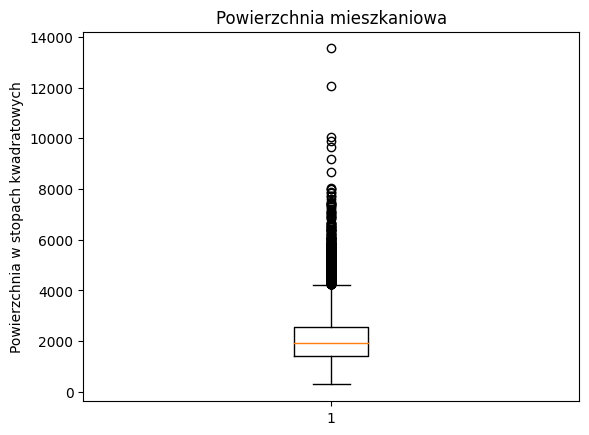

In [ ]:
plt.boxplot(df.sqft_living)
plt.title("Powierzchnia mieszkaniowa")
plt.ylabel("Powierzchnia w stopach kwadratowych")
plt.show()

c)

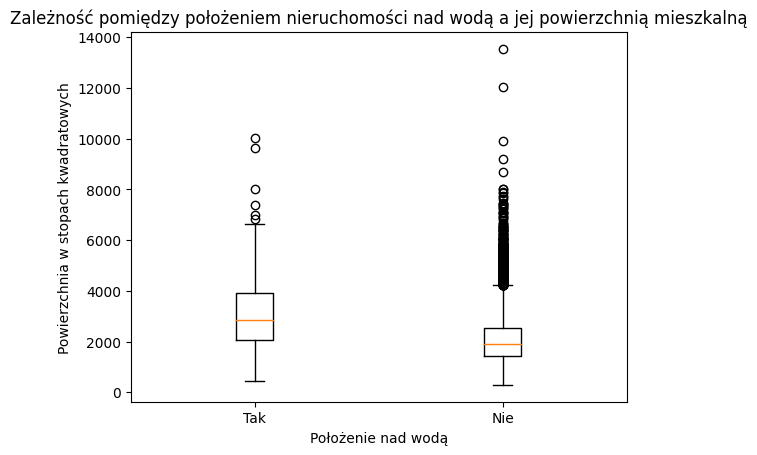

In [ ]:
w1 = list(df[df.waterfront == 1].sqft_living)
w2 = list(df[df.waterfront == 0].sqft_living)
lista = [w1,w2]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(lista)
plt.title("Zależność pomiędzy położeniem nieruchomości nad wodą a jej powierzchnią mieszkalną")
plt.xlabel("Położenie nad wodą")
plt.ylabel("Powierzchnia w stopach kwadratowych")
labels = ["Tak", "Nie"]
ax.set_xticklabels(labels)
plt.show()